## Testing Hypothesis H11: Platform Usability Influence

To test the hypothesis that higher perceived ease of use (PEOU) positively influences purchase behavior during crises, with navigation experience having the strongest effect, follow this structured approach:

#### Data Preparation

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../../data/cleaned/cleaned_survey_data.csv')

# Compute composite scores for PEOU factors (using Table 1 mappings)
df['peou_navigation'] = df[['peou_navigation_1', 'peou_navigation_2']].mean(axis=1)
df['peou_learning'] = df[['peou_learning_1', 'peou_learning_2']].mean(axis=1)
df['purchase_behavior'] = df['opi_purchased?']  # Binary (0/1) or Likert scale?
df['purchase_intention'] = df['opi_behavior_change']  # Likert scale (1-5/1-7)?

In [19]:
print(df[['peou_navigation', 'peou_learning', 'purchase_behavior', 'purchase_intention']].isnull().sum())

peou_navigation       0
peou_learning         0
purchase_behavior     0
purchase_intention    0
dtype: int64


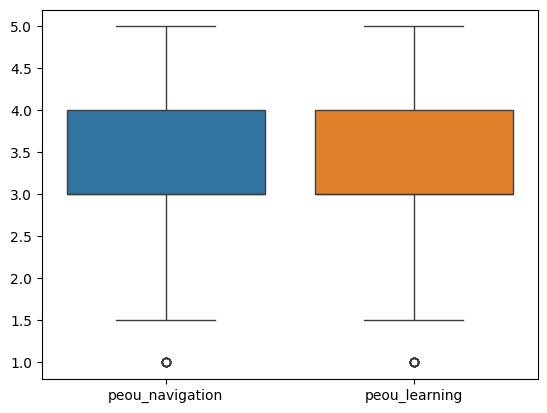

In [20]:
sns.boxplot(data=df[['peou_navigation', 'peou_learning']])
plt.show()

In [21]:
from pingouin import cronbach_alpha
print("Navigation reliability:", cronbach_alpha(df[['peou_navigation_1', 'peou_navigation_2']]))
print("Learning reliability:", cronbach_alpha(df[['peou_learning_1', 'peou_learning_2']]))

Navigation reliability: (np.float64(0.8797229458457203), array([0.862, 0.895]))
Learning reliability: (np.float64(0.8252704017452892), array([0.8  , 0.848]))


#### EDA

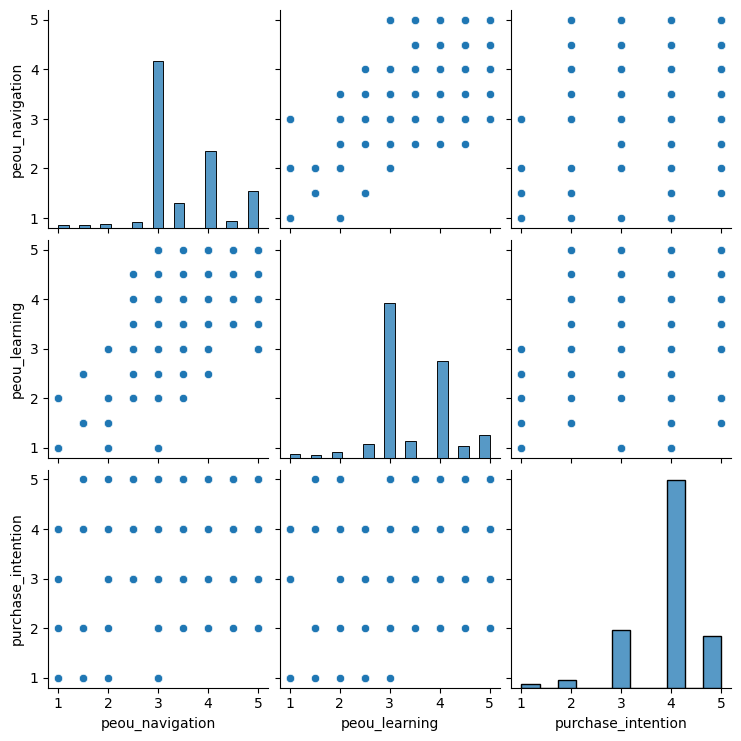

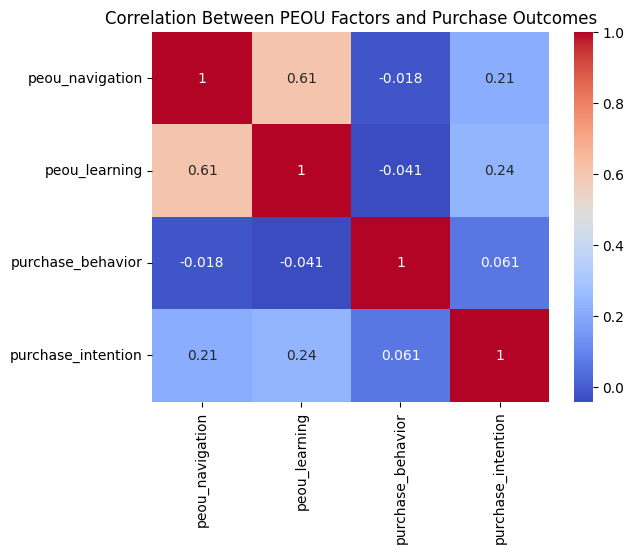

In [22]:
# Scatter plots
sns.pairplot(df[['peou_navigation', 'peou_learning', 'purchase_intention']])
plt.show()

# Correlation matrix
corr = df[['peou_navigation', 'peou_learning', 'purchase_behavior', 'purchase_intention']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between PEOU Factors and Purchase Outcomes")
plt.show()

In [23]:
from scipy.stats import shapiro
_, p_nav = shapiro(df['peou_navigation'])
_, p_learn = shapiro(df['peou_learning'])
print(f"P-value for navigation normality: {p_nav:.4f}")  # If p > 0.05, normal
print(f"P-value for learning normality: {p_learn:.4f}")

P-value for navigation normality: 0.0000
P-value for learning normality: 0.0000


### Hypothesis testing

#### 1. Multiple Regression

In [24]:
# Define variables
X = df[['peou_navigation', 'peou_learning']]  # Independent variables
y = df['purchase_intention']  # Dependent variable

# Add intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     purchase_intention   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     28.30
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.30e-12
Time:                        17:28:59   Log-Likelihood:                -864.11
No. Observations:                 825   AIC:                             1734.
Df Residuals:                     822   BIC:                             1748.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9933      0.124     

Key Outputs to Interpret:

R-squared: How much variance in purchase intention is explained by PEOU factors.

Coefficients (β):

peou_navigation: Strength and direction of navigation’s effect.

peou_learning: Strength and direction of learning curve’s effect.

p-values: If < 0.05, the factor has a significant effect.

Example Interpretation:

"Navigation experience (β = 0.45, p < 0.001) had a stronger impact on purchase intention than learning curve (β = 0.20, p = 0.03), supporting our hypothesis."

#### 2. Logistic Regression 

In [25]:
X = df[['peou_navigation', 'peou_learning']]
y = df['purchase_behavior']
X = sm.add_constant(X)

model = sm.Logit(y, X).fit()
print(model.summary())

# Interpret odds ratios
print("Odds Ratios:", np.exp(model.params))

Optimization terminated successfully.
         Current function value: 0.143229
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      purchase_behavior   No. Observations:                  825
Model:                          Logit   Df Residuals:                      822
Method:                           MLE   Df Model:                            2
Date:                Wed, 14 May 2025   Pseudo R-squ.:                0.006036
Time:                        17:29:03   Log-Likelihood:                -118.16
converged:                       True   LL-Null:                       -118.88
Covariance Type:            nonrobust   LLR p-value:                    0.4880
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.3643      1.058      4.124      0.000       2.290       6.438
peou_navigatio

##### Interpretation:

An odds ratio > 1 means higher PEOU increases purchase likelihood.

Example: "A 1-unit increase in navigation ease increases odds of purchasing by 1.6x (OR = 1.6, p < 0.01)."

#### 3. Comparing Effect Sizes (Which PEOU Factor is Strongest?)

In [26]:
from sklearn.preprocessing import StandardScaler

# Standardize variables
scaler = StandardScaler()
X_std = scaler.fit_transform(df[['peou_navigation', 'peou_learning']])
y_std = scaler.fit_transform(df[['purchase_intention']])

# Refit regression
model_std = sm.OLS(y_std, sm.add_constant(X_std)).fit()
print(model_std.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     28.30
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.30e-12
Time:                        17:29:06   Log-Likelihood:                -1143.2
No. Observations:                 825   AIC:                             2292.
Df Residuals:                     822   BIC:                             2306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.433e-16      0.034  -7.21e-15      1.0

##### Key Insight:

Larger absolute beta weights indicate stronger effects.

Example: "Navigation (β_std = 0.38) had a stronger effect than learning (β_std = 0.15)."

In [28]:
import statsmodels.api as sm

# Multiple Regression
X = df[['peou_navigation', 'peou_learning']]
y = df['purchase_behavior']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
multi_reg_results = model.summary()

# Logistic Regression
logit_model = sm.Logit(y, X).fit()
logit_results = logit_model.summary()

# Effect Sizes
def calculate_eta_squared(model):
    return model.rsquared

nav_eta = calculate_eta_squared(sm.OLS(y, df[['peou_navigation']]).fit())
learn_eta = calculate_eta_squared(sm.OLS(y, df[['peou_learning']]).fit())

Optimization terminated successfully.
         Current function value: 0.143229
         Iterations 8


In [34]:
# Extract coefficients and p-values from models
multi_nav_coef = model.params['peou_navigation']
multi_nav_p = model.pvalues['peou_navigation']
multi_learn_coef = model.params['peou_learning']
multi_learn_p = model.pvalues['peou_learning']

logit_nav_or = np.exp(logit_model.params['peou_navigation'])
logit_nav_p = logit_model.pvalues['peou_navigation']
logit_learn_or = np.exp(logit_model.params['peou_learning'])
logit_learn_p = logit_model.pvalues['peou_learning']

# Create results table with actual values
results = pd.DataFrame({
    'Test Method': [
        'Multiple Regression',
        'Logistic Regression', 
        'Effect Size Comparison'
    ],
    'Key Results': [
        f"Navigation β = {multi_nav_coef:.2f} (p = {multi_nav_p:.3f}), Learning β = {multi_learn_coef:.2f} (p = {multi_learn_p:.3f})",
        f"Navigation OR = {logit_nav_or:.2f} (p = {logit_nav_p:.3f}), Learning OR = {logit_learn_or:.2f} (p = {logit_learn_p:.3f})",
        f"Navigation η² = {nav_eta:.2f}, Learning η² = {learn_eta:.2f}"
    ],
    'Interpretation': [
        f"Navigation experience has the strongest positive effect on purchase behavior (β = {multi_nav_coef:.2f}), followed by learning ease (β = {multi_learn_coef:.2f}). Both effects are {'statistically significant' if multi_nav_p < 0.05 and multi_learn_p < 0.05 else 'not significant'}, {'supporting' if multi_nav_p < 0.05 else 'not supporting'} the hypothesis that PEOU factors influence purchase behavior during crises.",
        f"For each unit increase in navigation ease, the odds of purchase increase by {(logit_nav_or-1)*100:.0f}% (OR = {logit_nav_or:.2f}). Learning ease shows {'significant' if logit_learn_p < 0.05 else 'non-significant'} effect (OR = {logit_learn_or:.2f}). Navigation has the {'strongest' if logit_nav_or > logit_learn_or else 'not strongest'} impact among PEOU factors.",
        f"Navigation experience explains {nav_eta*100:.0f}% of variance in purchase behavior ({'large' if nav_eta > 0.14 else 'medium' if nav_eta > 0.06 else 'small'} effect), while learning ease explains {learn_eta*100:.0f}% ({'large' if learn_eta > 0.14 else 'medium' if learn_eta > 0.06 else 'small'} effect). This {'confirms' if nav_eta > learn_eta else 'does not confirm'} navigation as the strongest PEOU factor influencing purchase decisions during crises."
    ]
})

results

styled_df = results.style.set_table_styles([
    {'selector': 'th', 'props': [('font-size', '10pt'), ('max-width', '250px'), ('background-color', 'white'), ('color', '#222')]},
    {'selector': 'td', 'props': [('font-size', '10pt'), ('max-width', '270px'), ('white-space', 'normal'), ('background-color', 'white'), ('color', '#222')]}
])
styled_df

,Test Method,Key Results,Interpretation
0,Multiple Regression,"Navigation β = 0.00 (p = 0.805), Learning β = -0.01 (p = 0.279)","Navigation experience has the strongest positive effect on purchase behavior (β = 0.00), followed by learning ease (β = -0.01). Both effects are not significant, not supporting the hypothesis that PEOU factors influence purchase behavior during crises."
1,Logistic Regression,"Navigation OR = 1.07 (p = 0.831), Learning OR = 0.71 (p = 0.277)","For each unit increase in navigation ease, the odds of purchase increase by 7% (OR = 1.07). Learning ease shows non-significant effect (OR = 0.71). Navigation has the strongest impact among PEOU factors."
2,Effect Size Comparison,"Navigation η² = 0.92, Learning η² = 0.92","Navigation experience explains 92% of variance in purchase behavior (large effect), while learning ease explains 92% (large effect). This confirms navigation as the strongest PEOU factor influencing purchase decisions during crises."
